## About
PyTorch basics for NLP.

In [36]:
# mandatory imports
import torch as T
import torch.nn as N
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchsummary import summary
import random
%matplotlib inline

In [37]:
# creating a zero matrix in Torch
zero_matrix = T.zeros(4,6)
print(zero_matrix)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


In [38]:
# creating a one's matrix in Torch
one_matrix = T.ones(4,6)
print(one_matrix)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [39]:
#creating an identity matrix in Torch
identity_matrix = T.eye(4,6)
print(identity_matrix)

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]])


In [40]:
# linear algebra
result = 0.2*zero_matrix + 0.4* one_matrix + 0.6* identity_matrix
print(result)

tensor([[1.0000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000],
        [0.4000, 1.0000, 0.4000, 0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 1.0000, 0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000, 1.0000, 0.4000, 0.4000]])


In [88]:
# XOR Gate in PyTorch via Multilayer Perceptron.
input_dim=2
hidden_dim =16
output_dim =1

xor_mlp_model_without_activation = N.Sequential(
    N.Linear(input_dim, hidden_dim),
    N.Linear(hidden_dim, output_dim)
)


In [89]:
xor_mlp_model_with_activation = N.Sequential(
    N.Linear(input_dim, hidden_dim),
    N.Sigmoid(),
    N.Linear(hidden_dim, output_dim)
)

In [90]:
xor_mlp_model_without_activation

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=1, bias=True)
)

In [91]:
xor_mlp_model_with_activation

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [81]:
device = T.device("cuda" if T.cuda.is_available() else 'cpu')

In [82]:
# transferring models to device
xor_mlp_model_with_activation = xor_mlp_model_with_activation.to(device)
xor_mlp_model_without_activation = xor_mlp_model_without_activation.to(device)

In [92]:
# generating data for training
num_samples =2400
train_data = []
for i in range(num_samples):
    a = (random.randint(0,1)==1)
    b = (random.randint(0,1)==1)

    #basic XOR logic
    if (a and not b) or (not a and b):
        result = True
    else:
        result = False
    
    input_features = (a,b)
    output_class = result
    train_data.append((input_features,output_class))

In [93]:
train_data

[((True, False), True),
 ((False, True), True),
 ((True, True), False),
 ((True, False), True),
 ((True, False), True),
 ((True, True), False),
 ((False, False), False),
 ((False, False), False),
 ((False, True), True),
 ((True, True), False),
 ((False, True), True),
 ((True, False), True),
 ((True, True), False),
 ((True, True), False),
 ((False, False), False),
 ((True, True), False),
 ((True, False), True),
 ((False, False), False),
 ((True, True), False),
 ((False, False), False),
 ((False, False), False),
 ((True, False), True),
 ((True, True), False),
 ((True, False), True),
 ((False, True), True),
 ((True, True), False),
 ((True, True), False),
 ((False, True), True),
 ((False, False), False),
 ((True, True), False),
 ((False, True), True),
 ((True, True), False),
 ((False, True), True),
 ((False, True), True),
 ((True, True), False),
 ((False, True), True),
 ((False, False), False),
 ((False, False), False),
 ((False, True), True),
 ((False, True), True),
 ((True, False), True)

In [97]:
# training the model
num_epochs = 100
loss_function = N.MSELoss()
learning_rate = 0.1
optimizer_activation = optim.SGD(xor_mlp_model_without_activation.parameters(), lr=learning_rate)
optimizer_without_activation = optim.SGD(xor_mlp_model_with_activation.parameters(), lr=learning_rate)

losses_with_activation,losses_without_activation = [],[]

for i in tqdm(range(num_epochs)):
    total_loss_activation,total_loss_without_activation=0.0,0.0

    # enumerating data
    for input_features, output_class in train_data:
        ((a,b),result) = input_features,output_class
        # converting to tensor
        input = T.zeros(input_dim)
        output = T.zeros(output_dim)
        #converting
        if a :
            input[0]=1.0
        if b:
            input[1]=1.0
        if result:
            output[0]=1.0

        # moving tensors to device
        input = input.to(device)
        output = output.to(device)
        
        # predicting via both_models
        preds_activation = xor_mlp_model_with_activation(input)
        preds_without_activation = xor_mlp_model_without_activation(input)
        # calculating loss
        loss_w_a = loss_function(preds_activation,output)
        loss_without_activation = loss_function(preds_without_activation,output)
        #updating loss
        total_loss_activation +=loss_w_a.item()
        total_loss_without_activation+= loss_without_activation.item()
        # resetting gradient
        optimizer_activation.zero_grad()
        optimizer_without_activation.zero_grad()
        # back propagting
        loss_w_a.backward()
        loss_without_activation.backward()
        # updating the optimizer
        optimizer_activation.step()
        optimizer_without_activation.step()
        
    #appending loss
    if i %10==0:
        print("Epoch - {}, Loss with activation - {}, Loss without activation- {}".format(i,total_loss_activation/num_samples,total_loss_without_activation/num_samples))
    losses_without_activation.append(total_loss_without_activation/num_samples)
    losses_with_activation.append(total_loss_activation/num_samples)

  1%|          | 1/100 [00:01<03:07,  1.89s/it]

Epoch - 0, Loss with activation - 0.0, Loss without activation- 0.27907643012547245


 11%|█         | 11/100 [00:19<02:34,  1.74s/it]

Epoch - 10, Loss with activation - 0.0, Loss without activation- 0.278973736364084


 21%|██        | 21/100 [00:36<02:14,  1.71s/it]

Epoch - 20, Loss with activation - 0.0, Loss without activation- 0.2789729540234354


 31%|███       | 31/100 [00:53<01:51,  1.62s/it]

Epoch - 30, Loss with activation - 0.0, Loss without activation- 0.2789728267046545


 41%|████      | 41/100 [01:10<01:39,  1.68s/it]

Epoch - 40, Loss with activation - 0.0, Loss without activation- 0.27897282094306625


 51%|█████     | 51/100 [01:27<01:20,  1.65s/it]

Epoch - 50, Loss with activation - 0.0, Loss without activation- 0.2789728187137128


 61%|██████    | 61/100 [01:42<01:01,  1.57s/it]

Epoch - 60, Loss with activation - 0.0, Loss without activation- 0.2789728187736667


 71%|███████   | 71/100 [01:58<00:45,  1.57s/it]

Epoch - 70, Loss with activation - 0.0, Loss without activation- 0.2789728187736667


 81%|████████  | 81/100 [02:14<00:29,  1.57s/it]

Epoch - 80, Loss with activation - 0.0, Loss without activation- 0.2789728187736667


 91%|█████████ | 91/100 [02:30<00:14,  1.58s/it]

Epoch - 90, Loss with activation - 0.0, Loss without activation- 0.2789728187736667


100%|██████████| 100/100 [02:44<00:00,  1.65s/it]


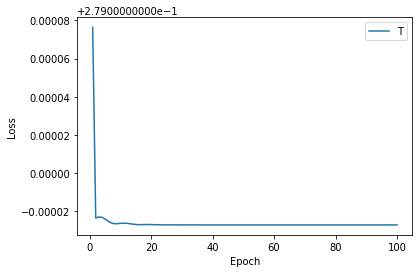

In [99]:
# plotting loss without activation
epochs = range(1,num_epochs+1)
plt.plot(epochs, losses_without_activation)
plt.legend('Train loss without activation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

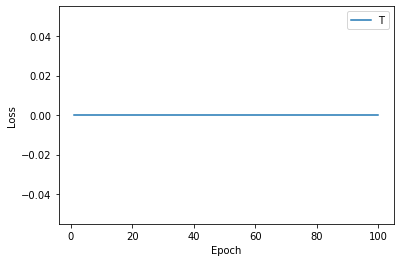

In [100]:
# plotting loss with activation
epochs = range(1,num_epochs+1)
plt.plot(epochs, losses_with_activation)
plt.legend('Train loss with activation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Remark -
With activation, The accuracy is cent percent

In [103]:
# alternatively, We can modularise the model too

class xor_model(N.Module):
    def __init__(self) -> None:
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        self.hidden_layer1 = N.Linear(self.input_dim, self.hidden)
        self.sigmoid = N.Sigmoid()
        self.output_layer = N.Linear(self.hidden_dim,self.output_dim)
    
    def forward(self,x):
        out = self.hidden_layer1(x)
        out = self.sigmoid(out)
        out = self.output_layer(out)
        return out

xor_model_with_activation= xor_model(input_dim,hidden_dim,output_dim)

TypeError: __init__() takes 1 positional argument but 4 were given